# Problem Statement:

### About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Business Need
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.drop('Loan_ID', axis = 1, inplace = True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [8]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

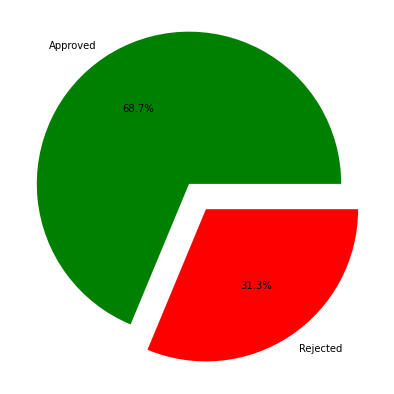

In [10]:
plt.figure(figsize = (12, 7))
labels = ['Approved', 'Rejected']
explode = [.1, .1]
mycolors = ['Green', 'Red']
sizes = data.Loan_Status.value_counts().values

plt.pie(sizes, explode, labels, autopct="%1.1f%%", colors = mycolors)
plt.show()

***From the above pie chart, we can observe that around 69% of the applications has been approved where as 31% applications has been rejected which indicates that about 2/3rd of the applicants has been granted the loan.***

In [11]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
# Lets visualize the distribution of numerical data

data_num = data.select_dtypes(include = np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
data_num.drop(['Loan_Amount_Term', 'Credit_History'], axis = 1, inplace = True)

In [14]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


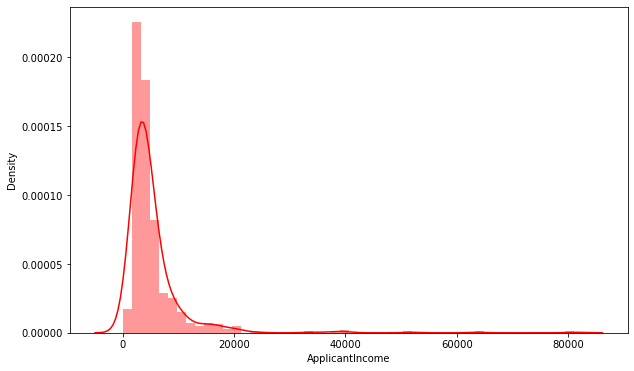

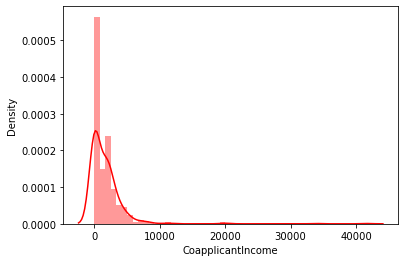

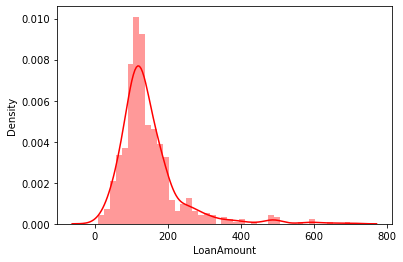

In [15]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

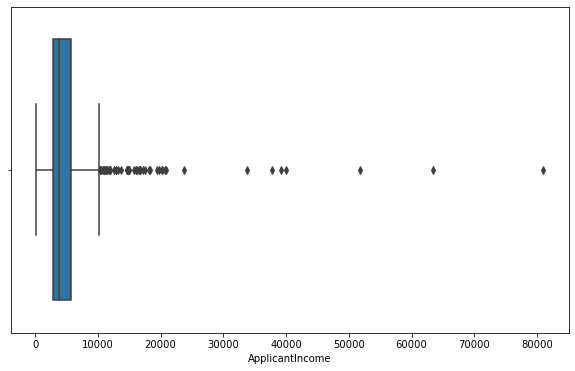

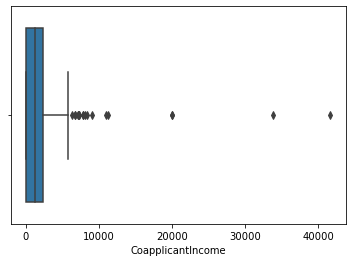

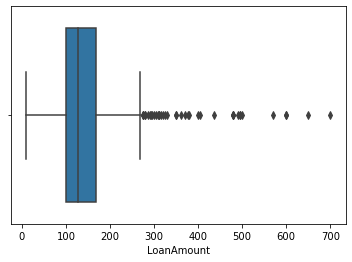

In [16]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

***From the above charts we can observe that the features contains an outliers and we are getting skewed distribution as well so that's why we need to handle the outliers with IQR method.***

In [17]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

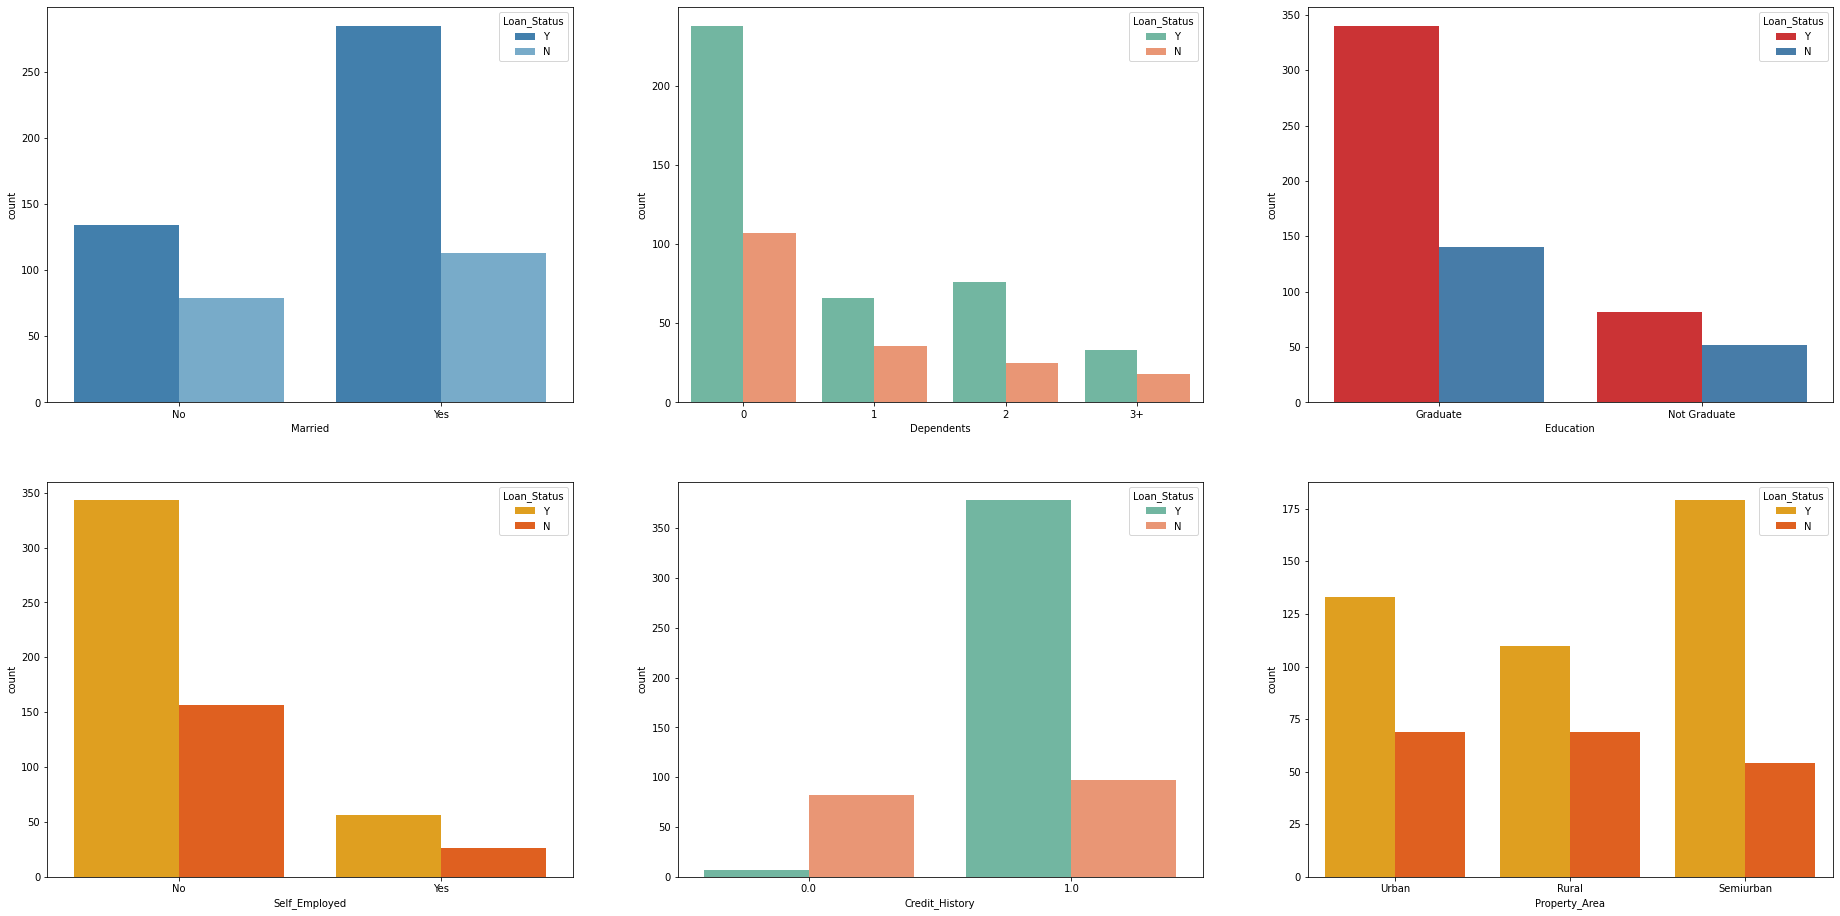

In [18]:
# Plot the countplot to analyze the relation between dependent and independent variables

fig, ax = plt.subplots(2, 3, figsize = (32, 16))

sns.countplot(x = 'Married', hue = 'Loan_Status', data = data, palette = 'tab20c', ax = ax[0][0])

sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = data, palette = 'Set2', ax = ax[0][1])

sns.countplot(x = 'Education', hue = 'Loan_Status', data = data, palette = 'Set1', ax = ax[0][2])

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data, palette = 'autumn_r', ax = ax[1][0])

sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = data, palette = 'Set2', ax = ax[1][1])

sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data, palette = 'autumn_r', ax = ax[1][2])

plt.show()

## Feature Engineering

### 1. Handle Missing Values

In [19]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [21]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 2. Handle Categorical Data

In [22]:
from sklearn.preprocessing import LabelEncoder

feature_cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for x in feature_cols:
    data[x] = le.fit_transform(data[x])

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### 3. Outlier Detection/Handling

In [24]:
# Outlier Treatment for ApplicantIncome

Q1 = data.ApplicantIncome.quantile(0.25)
Q3 = data.ApplicantIncome.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.ApplicantIncome >= Q1 - 3*IQR) & (data.ApplicantIncome <= Q3 + 3*IQR)]

In [25]:
# Outlier Treatment for Co-ApplicantIncome

Q1 = data.CoapplicantIncome.quantile(0.25)
Q3 = data.CoapplicantIncome.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.CoapplicantIncome >= Q1 - 3*IQR) & (data.CoapplicantIncome <= Q3 + 3*IQR)]

In [26]:
# Outlier Treatment for LoanAmount

Q1 = data.LoanAmount.quantile(0.25)
Q3 = data.LoanAmount.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.LoanAmount >= Q1 - 3*IQR) & (data.LoanAmount <= Q3 + 3*IQR)]

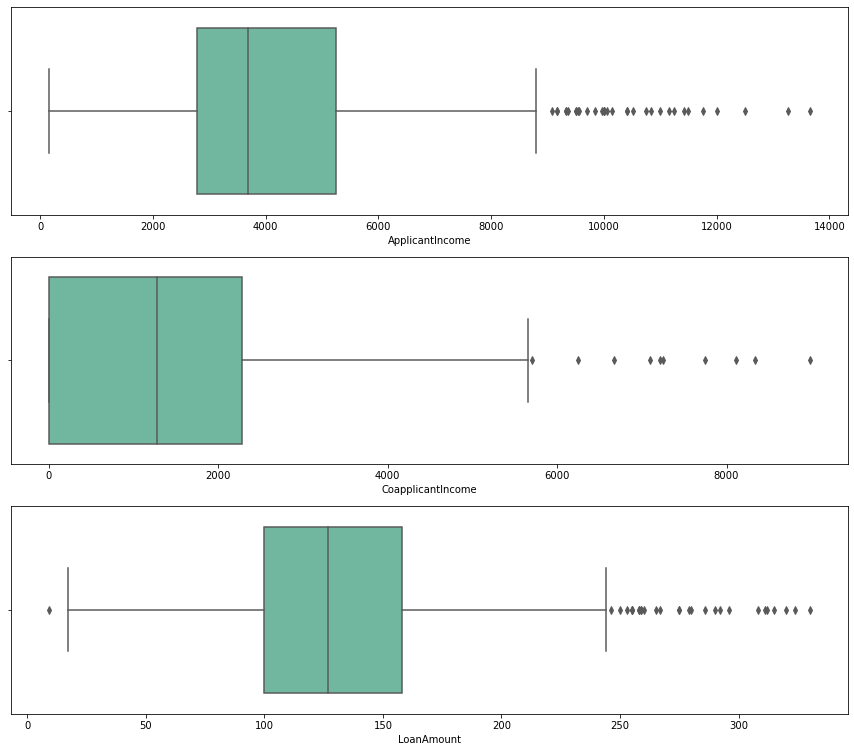

In [27]:
## Visualize the boxplot after treatment

fig, axs = plt.subplots(3,1, figsize = (15, 13))
plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2], palette = 'BuGn')

plt.show()

## Feature Selection

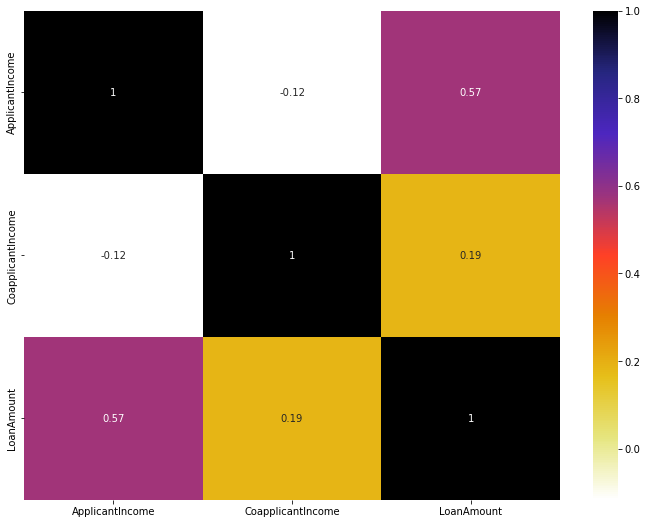

In [28]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap

plt.figure(figsize = (12, 9))
cor = data_num.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

In [29]:
## Chi-Square Test

from sklearn.feature_selection import chi2

In [30]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
df = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [32]:
x1 = df.drop('Loan_Status', axis = 'columns')
y1 = df['Loan_Status']

In [33]:
# return f-score and p-values
f_score = chi2(x1, y1)

In [34]:
f_score 

(array([ 0.11954126,  1.72779232,  0.1034337 ,  4.35000265,  0.3473718 ,
         2.77491401, 25.18454835,  0.29571963]),
 array([7.29532559e-01, 1.88693084e-01, 7.47747338e-01, 3.70088886e-02,
        5.55604671e-01, 9.57517988e-02, 5.20979354e-07, 5.86578355e-01]))

In [35]:
p_value = pd.Series(f_score[1], index = x1.columns)
p_value = p_value.sort_values(ascending = True)
p_value

Credit_History      5.209794e-07
Education           3.700889e-02
Loan_Amount_Term    9.575180e-02
Married             1.886931e-01
Self_Employed       5.556047e-01
Property_Area       5.865784e-01
Gender              7.295326e-01
Dependents          7.477473e-01
dtype: float64

In [36]:
cols = []

for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

Credit_History  :- Reject Null Hypothesis
Education  :- Reject Null Hypothesis
Loan_Amount_Term  :- Accept Null Hypothesis
Married  :- Accept Null Hypothesis
Self_Employed  :- Accept Null Hypothesis
Property_Area  :- Accept Null Hypothesis
Gender  :- Accept Null Hypothesis
Dependents  :- Accept Null Hypothesis


In [37]:
# drop the features that will not add any value to my model

data.drop(labels = cols, axis = 1, inplace = True)

In [38]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


In [39]:
## Feature Scaling -->> RobustScaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0.875406,-0.561650,0.017241,1.0,1
1,0,0.361607,0.100044,0.017241,1.0,0
2,0,-0.280844,-0.561650,-1.051724,1.0,1
3,1,-0.450081,0.473014,-0.120690,1.0,1
4,0,0.936688,-0.561650,0.241379,1.0,1


In [40]:
## Data Spliting

X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((456, 5), (115, 5))

## Model Building

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# create the instance of logistic regression model
model = LogisticRegression()

# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# fit the model
clf.fit(X_train, y_train)

GaussianNB()

In [60]:
# Support Vector Machine
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf')

#fit the model
classifier.fit(X_train, y_train)

SVC()

In [61]:
# Make a prediction for the training set
y_pred_tr = model.predict(X_train)

In [62]:
y_pred_tr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [63]:
# Make a prediction for the testing set
y_pred_te = model.predict(X_test)

In [64]:
y_pred_nb = clf.predict(X_test)

In [65]:
y_pred_svc = classifier.predict(X_test)

In [66]:
y_pred_te

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

## Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [68]:
# print the accuracy on training data and test data

print("Accuracy Score on training data:", accuracy_score(y_train, y_pred_tr))
print("Accuracy Score on test data:", accuracy_score(y_test, y_pred_te))
print("Accuracy Score on test data using Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Accuracy Score on test data using SVM:", accuracy_score(y_test, y_pred_svc))

Accuracy Score on training data: 0.8157894736842105
Accuracy Score on test data: 0.808695652173913
Accuracy Score on test data using Naive Bayes: 0.808695652173913
Accuracy Score on test data using SVM: 0.808695652173913


In [57]:
# print the precison-score

print('Precision Score:', precision_score(y_test, y_pred_svc))

Precision Score: 0.7843137254901961


In [50]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_te))

Recall Score: 1.0


In [51]:
# print the F1-score

print('F1 Score:', f1_score(y_test, y_pred_te))

F1 Score: 0.8791208791208792


In [58]:
# print the classification report

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.78      1.00      0.88        80

    accuracy                           0.81       115
   macro avg       0.89      0.69      0.71       115
weighted avg       0.85      0.81      0.78       115



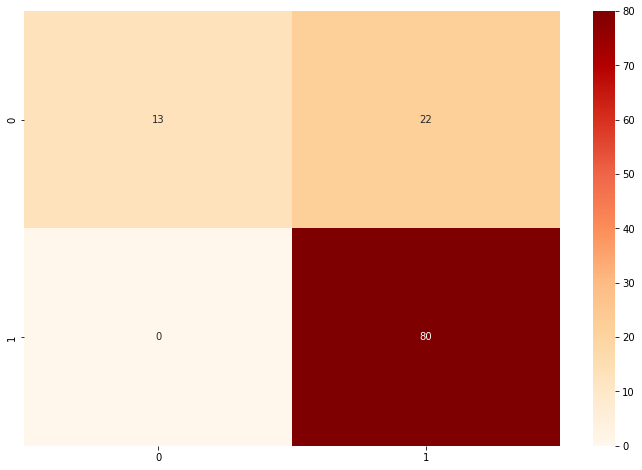

In [59]:
## Plot the confusion matrix

plt.figure(figsize = (12, 8))

cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show()

In [54]:
X_test

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
546,1,-0.135552,-0.561650,-0.810345,1.0
71,1,-0.737419,0.261079,-0.517241,1.0
135,0,0.125000,2.838964,2.810345,1.0
549,0,-0.368101,0.322949,-0.293103,1.0
582,0,-0.213474,-0.561650,-1.568966,1.0
...,...,...,...,...,...
76,0,0.023539,1.522598,0.844828,1.0
263,0,1.423701,-0.561650,-0.120690,1.0
566,0,-0.145698,-0.561650,-0.982759,1.0
282,0,-0.564529,-0.129092,-0.844828,1.0


In [55]:
y_pred_te

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

## Build the Predictive System

In [57]:
input_data = (0, 2581, 2381.0, 12000.0, 0)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

# scale the input data
#scaled_data = scaler.fit_transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 1:
    print("The application is approved")
else:
    print("The application is rejected")

The application is rejected


In [64]:
# saving the model 
import pickle 
pickle_out = open("Automating_Loan_Prediction_System.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()